# Pipeline

For demonstration purpases we use a prerecorded run. We divide this run into chunks of length $N$ and on them do our processing and prediction steps. In reality the chunks would be a sliding window in time. 


In [13]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt
from utils import load_as_dataframe
from load_model import svm_predict
from visualization import visualize

## Load run

In [14]:
folder = 'data'
subfolder = 'mixed'
filename = 'mixed_farness_1_moving_2_radardata_2022_05_08_17_41_04.npz'

df = load_as_dataframe(os.path.join(folder, subfolder), filename)
print(df)

          abses0    abses1    abses2      phases
0       0.099393  1.093958  0.587057    0.712055
1       0.100724  1.091693  0.582013    0.728975
2       0.101584  1.089097  0.581764    0.742461
3       0.103449  1.086198  0.580267    0.768308
4       0.099991  1.079564  0.588127    0.779405
...          ...       ...       ...         ...
179995  0.053717  0.797209  0.950625  387.281911
179996  0.052414  0.793769  0.949194  387.300826
179997  0.054202  0.788159  0.969904  387.305316
179998  0.055482  0.798560  0.967892  387.309080
179999  0.055677  0.788956  0.969473  387.294178

[180000 rows x 4 columns]


## Model

In [15]:
movement_model_folder = 'svm_acc_95_2022_05_08_16_19_22'

with open(os.path.join(movement_model_folder, 'hyperparams.json'), 'r') as f:
    hyperparams = json.load(f)

In [16]:
pred_movement = svm_predict(movement_model_folder, df)
pred_movement_repeatd = np.repeat(pred_movement, hyperparams['chunk_size'])


100%|██████████| 60/60 [00:00<00:00, 118.38it/s]


In [17]:
stress_model_folder = 'stress_svm_acc_85_2022_05_08_17_18_08'

with open(os.path.join(movement_model_folder, 'hyperparams.json'), 'r') as f:
    hyperparams = json.load(f)
    
pred_stress = svm_predict(stress_model_folder, df)
pred_stress_repeatd = np.repeat(pred_stress, hyperparams['chunk_size'])
pred_stress_repeatd[pred_movement_repeatd == 1] = np.nan


100%|██████████| 60/60 [00:00<00:00, 126.13it/s]


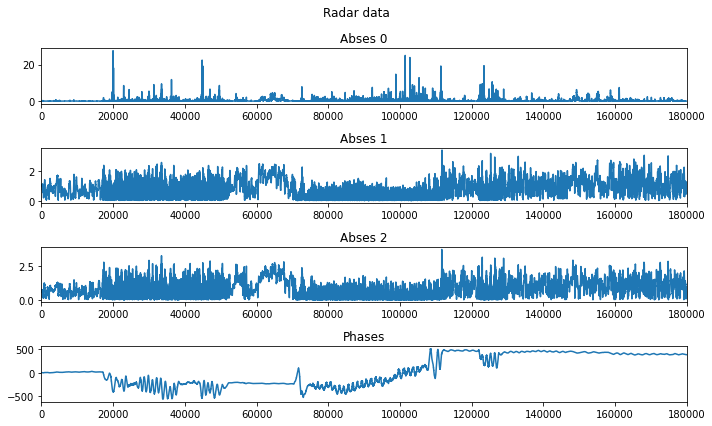

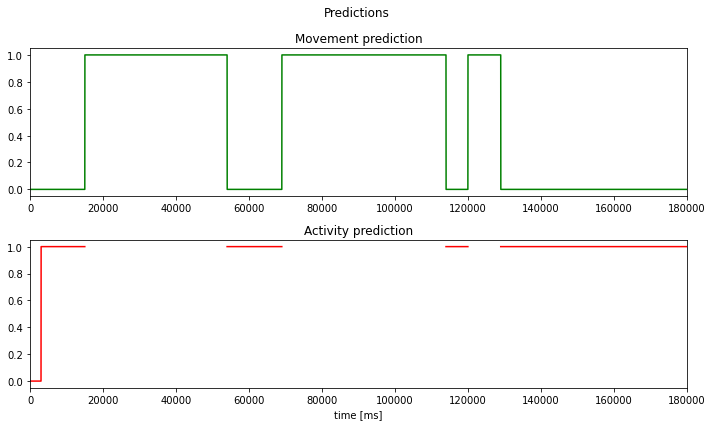

In [18]:
title = 'Radar data'
color = None
figsize = (10, 6)

visualize(os.path.join(folder, subfolder), filename, title, color, figsize=figsize, xlim=[0, len(pred_stress_repeatd)])

fig, ax = plt.subplots(2, 1, figsize=figsize)
fig.suptitle('Predictions')

ax[0].plot(pred_movement_repeatd, color='g')
ax[0].set_title('Movement prediction')
ax[0].set_xlim([0, len(pred_stress_repeatd)])


ax[1].plot(pred_stress_repeatd, color='r')
ax[1].set_title('Activity prediction')
ax[1].set_xlim([0, len(pred_stress_repeatd)])
ax[1].set_xlabel('time [ms]')
fig.tight_layout()